# 마이너리그 시즌 별 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np


#minor = pd.read_excel("./103_pre.xlsx", engine = "openpyxl")
#minor = pd.read_excel("./103_pre2.xlsx", engine = "openpyxl")

#minor1 = pd.read_csv('./마이너리그시즌데이터/minor1.csv')
#minor2 = pd.read_csv('./마이너리그시즌데이터/minor2.csv')
#minor3 = pd.read_csv('./마이너리그시즌데이터/minor3.csv')

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

minor1 = pd.read_csv("./마이너타자1.csv")
minor2 = pd.read_csv("./마이너타자2.csv")
minor3 = pd.read_csv("./마이너타자3.csv")

minor_batter = pd.read_csv("./외국인타자_마이너성적.csv")

In [3]:
temp_columns1 = set(minor1.columns) & set(minor2.columns)

temp1 = pd.merge(minor1, minor2, on = list(temp_columns1))

temp_columns2 = set(temp1.columns) & set(minor3.columns)

temp2 = pd.merge(temp1, minor3, on = list(temp_columns2))

merge_minor_df = temp2.copy()

minor_columns = ["Season","G","PA","AB","R","H","2B","3B","HR","RBI","SB","CS","BB","SO","AVG","OBP","SLG","OPS","GDP","HBP","SH","SF","IBB"]
minor_columns2 = ["G","PA","AB","R","H","2B","3B","HR","RBI","SB","CS","BB","SO","AVG","OBP","SLG","OPS","GDP","HBP","SH","SF","IBB"]

merge_minor_df = merge_minor_df[minor_columns]
merge_minor_df["TB"] = merge_minor_df["H"] - (merge_minor_df["2B"] + merge_minor_df["3B"] + merge_minor_df["HR"]) +\
                        merge_minor_df["2B"] * 2 + merge_minor_df["3B"] * 3 + merge_minor_df["HR"] * 4

merge_minor_df = merge_minor_df.sort_values(by = "Season").reset_index(drop = True)

merge_minor_df

,Season,G,PA,AB,R,H,2B,3B,HR,RBI,...,AVG,OBP,SLG,OPS,GDP,HBP,SH,SF,IBB,TB
0,2013,37,141,124,19,42,10,1,2,25,...,0.338710,0.404255,0.483871,0.888126,0,1,0,2,1,60
1,2013,45,198,173,23,40,13,1,3,22,...,0.231214,0.318182,0.369942,0.688124,2,1,0,2,2,64
2,2013,136,579,506,61,139,33,5,8,49,...,0.274704,0.362694,0.407115,0.769809,8,6,0,2,0,206
3,2013,103,345,304,36,97,27,3,3,32,...,0.319079,0.380117,0.457237,0.837354,6,4,3,5,2,139
4,2013,52,201,177,28,39,5,0,5,15,...,0.220339,0.306533,0.333333,0.639866,2,0,2,0,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,2022,67,267,244,27,61,12,4,5,34,...,0.250000,0.303371,0.393443,0.696813,3,1,0,3,0,96
4613,2022,135,604,545,81,152,31,9,16,67,...,0.278899,0.344371,0.456881,0.801252,6,10,0,3,3,249
4614,2022,127,520,452,55,99,26,4,16,72,...,0.219027,0.304432,0.400442,0.704874,7,10,1,8,0,181
4615,2022,50,202,170,20,54,8,1,8,30,...,0.317647,0.420792,0.517647,0.938439,5,4,0,1,1,88


In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss_df = pd.DataFrame(columns=minor_columns)
seasons = [2013,2014,2015,2016,2017,2018,2019,2021]

for season in seasons:
    
    temp1 = merge_minor_df[merge_minor_df["Season"] == season]
    ss.fit(temp1[minor_columns])
    temp2 = ss.transform(minor_batter[minor_batter["Season"] == season][minor_columns])
    temp2 = pd.DataFrame(temp2, columns=minor_columns)
    ss_df = ss_df.append(temp2[minor_columns])


In [5]:
ss_df

,Season,G,PA,AB,R,H,2B,3B,HR,RBI,...,SO,AVG,OBP,SLG,OPS,GDP,HBP,SH,SF,IBB
0,0.0,1.012380,1.113660,1.034952,1.165216,0.952396,0.828824,-0.406785,1.003549,0.969044,...,0.464343,0.083108,0.427129,0.197270,0.301865,0.253353,0.062690,-0.785232,1.784849,-0.721945
1,0.0,-1.723856,-1.573108,-1.524695,-1.289978,-1.341288,-1.135063,-0.879149,-0.452164,-0.627925,...,-1.565487,0.681964,-0.785851,1.049354,0.438993,-0.237549,-1.077203,-0.785232,-0.194114,-0.721945
2,0.0,-0.748875,-0.682467,-0.758485,-0.610882,-0.905778,-0.766835,-0.879149,-0.270200,-0.679440,...,-0.452354,-0.939938,-0.246748,-0.557434,-0.486626,0.007902,-1.077203,-0.785232,1.290109,0.161815
3,0.0,1.263988,1.158192,1.211770,2.105503,1.649212,1.810767,1.482673,1.003549,1.329649,...,1.937607,1.181010,0.786531,1.122390,1.090355,0.007902,-0.697239,-0.396139,1.290109,1.045575
4,0.0,0.634968,0.876156,0.900234,1.217454,1.155634,1.688024,0.065580,0.457656,1.638740,...,-0.190441,0.831678,0.449592,0.647657,0.618975,-0.237549,0.442655,-0.785232,2.774331,3.696854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.0,0.613873,0.738645,0.586757,1.358929,0.603075,-0.362976,1.103570,0.475149,0.472237,...,0.448507,0.284175,1.027181,0.122011,0.446248,0.508858,2.148787,-0.487296,-1.098004,0.774380
6,0.0,-0.486685,-0.389728,-0.371489,-0.575362,-0.489745,-0.362976,0.448325,-0.694323,-0.712259,...,0.022885,-0.474839,-0.411105,-0.594888,-0.581003,-0.671003,-0.109503,-0.487296,-0.496856,-0.549810
7,0.0,0.967624,1.250680,1.129762,2.144735,1.258767,1.935871,-0.206919,1.811687,1.995161,...,1.796310,0.574386,0.921425,1.067918,1.106624,1.098789,1.301929,-0.487296,0.104293,-0.549810
8,0.0,1.753737,1.648929,1.704709,1.419376,1.404476,0.709819,0.448325,0.141014,1.205497,...,1.335220,-0.073008,-0.495710,-0.555060,-0.581003,0.213893,0.737356,-0.487296,2.508888,-0.549810


In [6]:
ss_df = ss_df.reset_index(drop=True)
ss_df

,Season,G,PA,AB,R,H,2B,3B,HR,RBI,...,SO,AVG,OBP,SLG,OPS,GDP,HBP,SH,SF,IBB
0,0.0,1.012380,1.113660,1.034952,1.165216,0.952396,0.828824,-0.406785,1.003549,0.969044,...,0.464343,0.083108,0.427129,0.197270,0.301865,0.253353,0.062690,-0.785232,1.784849,-0.721945
1,0.0,-1.723856,-1.573108,-1.524695,-1.289978,-1.341288,-1.135063,-0.879149,-0.452164,-0.627925,...,-1.565487,0.681964,-0.785851,1.049354,0.438993,-0.237549,-1.077203,-0.785232,-0.194114,-0.721945
2,0.0,-0.748875,-0.682467,-0.758485,-0.610882,-0.905778,-0.766835,-0.879149,-0.270200,-0.679440,...,-0.452354,-0.939938,-0.246748,-0.557434,-0.486626,0.007902,-1.077203,-0.785232,1.290109,0.161815
3,0.0,1.263988,1.158192,1.211770,2.105503,1.649212,1.810767,1.482673,1.003549,1.329649,...,1.937607,1.181010,0.786531,1.122390,1.090355,0.007902,-0.697239,-0.396139,1.290109,1.045575
4,0.0,0.634968,0.876156,0.900234,1.217454,1.155634,1.688024,0.065580,0.457656,1.638740,...,-0.190441,0.831678,0.449592,0.647657,0.618975,-0.237549,0.442655,-0.785232,2.774331,3.696854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.613873,0.738645,0.586757,1.358929,0.603075,-0.362976,1.103570,0.475149,0.472237,...,0.448507,0.284175,1.027181,0.122011,0.446248,0.508858,2.148787,-0.487296,-1.098004,0.774380
72,0.0,-0.486685,-0.389728,-0.371489,-0.575362,-0.489745,-0.362976,0.448325,-0.694323,-0.712259,...,0.022885,-0.474839,-0.411105,-0.594888,-0.581003,-0.671003,-0.109503,-0.487296,-0.496856,-0.549810
73,0.0,0.967624,1.250680,1.129762,2.144735,1.258767,1.935871,-0.206919,1.811687,1.995161,...,1.796310,0.574386,0.921425,1.067918,1.106624,1.098789,1.301929,-0.487296,0.104293,-0.549810
74,0.0,1.753737,1.648929,1.704709,1.419376,1.404476,0.709819,0.448325,0.141014,1.205497,...,1.335220,-0.073008,-0.495710,-0.555060,-0.581003,0.213893,0.737356,-0.487296,2.508888,-0.549810


In [7]:
X = ss_df[minor_columns2]
X = X.astype(float)
y = minor_batter["재계약"]

In [8]:
X.head(1)

,G,PA,AB,R,H,2B,3B,HR,RBI,SB,...,SO,AVG,OBP,SLG,OPS,GDP,HBP,SH,SF,IBB
0,1.01238,1.11366,1.034952,1.165216,0.952396,0.828824,-0.406785,1.003549,0.969044,0.340196,...,0.464343,0.083108,0.427129,0.19727,0.301865,0.253353,0.06269,-0.785232,1.784849,-0.721945


In [9]:
print(X.columns)
print(len(X.columns))

Index(['G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'AVG', 'OBP', 'SLG', 'OPS', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')
22


In [10]:
# 기본패키지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
#pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)

In [11]:
def cross_val_five_models(scoring, random_state = 77) :
    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)
    
    lr_cross = cross_val_score(lr, X,y,cv=cv, scoring = scoring)
    rf_cross = cross_val_score(rf, X,y,cv=cv, scoring = scoring)
    xgb_cross = cross_val_score(xgb, X,y,cv=cv, scoring = scoring)
    lgbm_cross = cross_val_score(lgbm, X,y,cv=cv, scoring = scoring)
    cat_cross = cross_val_score(cat, X,y,cv=cv, scoring = scoring)
    print(f'lr : {lr_cross}, mean : {lr_cross.mean()}')
    print(f'rf : {rf_cross}, mean : {rf_cross.mean()}')
    print(f'xgb : {xgb_cross}, mean : {xgb_cross.mean()}')
    print(f'lgbm : {lgbm_cross}, mean : {lgbm_cross.mean()}')
    print(f'cat : {cat_cross}, mean : {cat_cross.mean()}')

def three_evaluation():
    for evaluation in ["accuracy","roc_auc","precision"] :
        print("-----",evaluation,"-----")
        print(cross_val_five_models(evaluation))
    

In [12]:
three_evaluation()

----- accuracy -----
lr : [0.6875     0.6        0.53333333 0.8        0.46666667], mean : 0.6175
rf : [0.4375     0.53333333 0.53333333 0.8        0.46666667], mean : 0.5541666666666667
xgb : [0.375      0.53333333 0.46666667 0.73333333 0.6       ], mean : 0.5416666666666667
lgbm : [0.5        0.4        0.6        0.8        0.53333333], mean : 0.5666666666666667
cat : [0.5        0.46666667 0.53333333 0.8        0.46666667], mean : 0.5533333333333333
None
----- roc_auc -----
lr : [0.66666667 0.61111111 0.59259259 0.72       0.54      ], mean : 0.6260740740740741
rf : [0.40833333 0.47222222 0.48148148 0.97       0.59      ], mean : 0.5844074074074074
xgb : [0.38333333 0.51851852 0.55555556 0.8        0.7       ], mean : 0.5914814814814815
lgbm : [0.51666667 0.5462963  0.5        0.7        0.6       ], mean : 0.5725925925925927
cat : [0.33333333 0.51851852 0.55555556 0.94       0.56      ], mean : 0.5814814814814815
None
----- precision -----
lr : [0.6        0.5        0.33333333 0.

In [31]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv).mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv).mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv).mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv).mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv).mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv).mean()}')

lr : 0.6175
svc : 0.5916666666666666
rf : 0.5541666666666667
cat : 0.5533333333333333
xgb : 0.5416666666666667
lgbm: 0.5666666666666667


In [32]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="roc_auc").mean()}')

lr : 0.6260740740740741
svc : 0.6115555555555556
rf : 0.5627407407407408
cat : 0.5814814814814815
xgb : 0.5914814814814815
lgbm: 0.5725925925925927


In [33]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="precision").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="precision").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="precision").mean()}')

lr : 0.47666666666666674
svc : 0.31666666666666665
rf : 0.42333333333333334
cat : 0.30666666666666664
xgb : 0.38571428571428573
lgbm: 0.41666666666666663


In [123]:
print(y.value_counts())
print(f'28/76 = {28/76}')
print(f'48/76 = {48/76}')

0    48
1    28
Name: 재계약, dtype: int64
28/76 = 0.3684210526315789
48/76 = 0.631578947368421


In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
cross_val_score(nb, X,y, cv=5, scoring="precision").mean()

0.464047619047619

In [35]:
minor_batter.head(2)

,Season,연도,구단,이름,재계약,G,PA,AB,R,H,...,AVG,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
0,2013,2014,삼성,야마이코 나바로,1,108,452,390,59,104,...,0.267,0.354,0.418,0.772,163,7,3,0,6,0
1,2013,2014,두산,호르헤 칸투,0,21,90,86,12,25,...,0.291,0.300,0.488,0.788,42,5,0,0,2,0


In [13]:
X = minor_batter.iloc[:,5:]
y = minor_batter["재계약"]

In [14]:
three_evaluation()

----- accuracy -----
lr : [0.625      0.66666667 0.6        0.73333333 0.46666667], mean : 0.6183333333333334
rf : [0.5625     0.53333333 0.6        0.66666667 0.46666667], mean : 0.5658333333333333
xgb : [0.5        0.46666667 0.53333333 0.73333333 0.53333333], mean : 0.5533333333333333
lgbm : [0.625      0.46666667 0.6        0.73333333 0.53333333], mean : 0.5916666666666667
cat : [0.4375     0.53333333 0.46666667 0.8        0.53333333], mean : 0.5541666666666666
None
----- roc_auc -----
lr : [0.6        0.61111111 0.61111111 0.48       0.47      ], mean : 0.5544444444444445
rf : [0.45       0.49074074 0.55555556 0.98       0.61      ], mean : 0.6172592592592593
xgb : [0.41666667 0.46296296 0.59259259 0.82       0.63      ], mean : 0.5844444444444444
lgbm : [0.58333333 0.47222222 0.62962963 0.8        0.61      ], mean : 0.6190370370370369
cat : [0.46666667 0.5        0.62962963 0.96       0.65      ], mean : 0.6412592592592593
None
----- precision -----
lr : [0.5        0.66666667 0

In [37]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv).mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv).mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv).mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv).mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv).mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv).mean()}')

lr : 0.6183333333333334
svc : 0.6183333333333333
rf : 0.6183333333333334
cat : 0.5541666666666666
xgb : 0.5533333333333333
lgbm: 0.5916666666666667


In [38]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="roc_auc").mean()}')

lr : 0.5544444444444445
svc : 0.5952592592592593
rf : 0.5872592592592593
cat : 0.6412592592592593
xgb : 0.5844444444444444
lgbm: 0.6190370370370369


In [39]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="precision").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="precision").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="precision").mean()}')

lr : 0.5066666666666666
svc : 0.0
rf : 0.4666666666666667
cat : 0.3733333333333333
xgb : 0.39166666666666666
lgbm: 0.4666666666666667


#  메이저리그 기록 표준화

In [12]:
korea_major = pd.read_csv("./외국인타자MLB배럴성적2.csv")
korea_major = korea_major.iloc[:-5]
korea_major = korea_major.sort_values(by = "Season", ascending = True).reset_index(drop = True)

major = pd.read_csv("./1522메이저타자.csv")
major = major.rename(columns = {"year" : "Season"})
major = major.sort_values(by = "Season", ascending=True).reset_index(drop = True)


In [13]:
major

,last_name,first_name,player_id,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,Barrel/PA,...,XBA,XSLG,WOBA,XWOBA,XWOBACON,Exit Velocity,Launch Angle,Sweet Spot %,HardHit%,Max EV
0,Conforto,Michael,624424,2015,22,743,137,13,9.5,6.701031,...,0.284,0.539,0.359,0.382,0.451,92.3,13.4,33.6,47.4,102.522868
1,Burns,Billy,542993,2015,25,1943,442,2,0.5,0.360360,...,0.239,0.288,0.317,0.260,0.278,83.2,8.1,26.9,14.7,92.105101
2,Beckham,Tim,542921,2015,25,899,138,8,5.8,3.587444,...,0.220,0.359,0.300,0.282,0.376,87.0,8.8,33.3,37.7,99.361280
3,Santana,Danny,542454,2015,24,940,200,1,0.5,0.361011,...,0.200,0.248,0.231,0.214,0.271,86.1,5.9,22.5,23.5,96.129559
4,Villar,Jonathan,542340,2015,24,501,89,3,3.4,2.343750,...,0.247,0.357,0.328,0.295,0.350,90.7,2.8,23.6,38.2,100.806731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,Nootbaar,Lars,663457,2022,24,1389,224,27,12.1,7.780980,...,0.247,0.414,0.342,0.346,0.377,91.7,10.7,30.4,46.0,101.790400
3455,Nevin,Tyler,663527,2022,25,793,114,4,3.5,2.173913,...,0.212,0.324,0.261,0.291,0.324,87.3,17.7,34.2,37.7,98.356865
3456,Hoerner,Nico,663538,2022,25,1831,426,11,2.6,2.127660,...,0.270,0.367,0.320,0.301,0.314,87.2,10.6,32.4,33.5,97.678972
3457,Garcia,Dermis,660650,2022,24,535,61,8,13.1,6.400000,...,0.167,0.324,0.285,0.244,0.398,86.5,12.2,27.9,42.6,100.773492


In [14]:
columns = list(korea_major.columns)
columns.remove("영문이름")
columns.remove("이름")
columns.remove("구단")

columns1 = columns.copy()
columns1.remove("재계약")

In [15]:
korea_major["Season"].value_counts()

2019    12
2018     8
2021     8
2015     6
2016     5
2017     5
2020     1
Name: Season, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss_df = pd.DataFrame(columns=columns1)

for season in range(2015,2021+1):
    temp1 = major[major["Season"] == season]
    #temp2 = ss.fit_transform(temp1[columns])
    ss.fit(temp1[columns1])
    #print(ss.transform(temp1[column_orders]))
    temp2 = ss.transform(korea_major[korea_major["Season"] == season][columns1])
    temp2 = pd.DataFrame(temp2, columns = columns1)
    ss_df = ss_df.append(temp2[columns1])

ss_df = ss_df.reset_index(drop = True)


In [17]:
X = ss_df.drop(columns = ["Season"])
X = X.astype(float)
y = korea_major["재계약"]

In [18]:
print(X.columns)


Index(['Age', 'Pitches', 'Batted Balls', 'Barrels', 'Barrel%', 'Barrel/PA',
       'Exit Velocity', 'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA',
       'XSLG', 'WOBA', 'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%'],
      dtype='object')


In [19]:
X.shape

(45, 18)

In [36]:
temp = X.copy()
temp["재계약"] = y
#temp.to_csv("./메이저기록타자표준화.csv", index=False)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
#pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
import warnings
warnings.filterwarnings(action='ignore')

In [38]:
30/46

0.6521739130434783

In [39]:
three_evaluation()

----- accuracy -----
lr : [0.44444444 0.88888889 0.77777778 0.77777778 0.33333333], mean : 0.6444444444444445
rf : [0.55555556 0.66666667 0.66666667 0.55555556 0.55555556], mean : 0.6
xgb : [0.55555556 0.55555556 0.66666667 0.44444444 0.44444444], mean : 0.5333333333333334
lgbm : [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667], mean : 0.6666666666666666
cat : [0.55555556 0.66666667 0.55555556 0.66666667 0.55555556], mean : 0.6
None
----- roc_auc -----
lr : [0.36111111 0.72222222 0.77777778 0.33333333 0.27777778], mean : 0.49444444444444446
rf : [0.36111111 0.5        0.55555556 0.55555556 0.41666667], mean : 0.47777777777777775
xgb : [0.19444444 0.66666667 0.38888889 0.5        0.44444444], mean : 0.43888888888888894
lgbm : [0.5 0.5 0.5 0.5 0.5], mean : 0.5
cat : [0.25       0.55555556 0.38888889 0.44444444 0.44444444], mean : 0.41666666666666663
None
----- precision -----
lr : [0. 1. 1. 1. 0.], mean : 0.6
rf : [0.  0.5 0.  0.5 0. ], mean : 0.2
xgb : [0.  0.4 0.  0.  0. ], mea

In [48]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv).mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv).mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv).mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv).mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv).mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv).mean()}')

lr : 0.6311111111111111
svc : 0.6533333333333332
rf : 0.6755555555555555
cat : 0.6555555555555556
xgb : 0.6333333333333333
lgbm: 0.6533333333333332


In [49]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="roc_auc").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="roc_auc").mean()}')

lr : 0.5986111111111112
svc : 0.5291666666666666
rf : 0.6402777777777778
cat : 0.5819444444444445
xgb : 0.6291666666666667
lgbm: 0.5


In [50]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X,y, cv=cv,scoring="precision").mean()}')
print(f'svc : {cross_val_score(svc, X,y, cv=cv,scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf, X,y, cv=cv,scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat, X,y, cv=cv,scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb, X,y, cv=cv,scoring="precision").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X,y, cv=cv,scoring="precision").mean()}')

lr : 0.47999999999999987
svc : 0.0
rf : 0.5
cat : 0.36666666666666664
xgb : 0.4133333333333333
lgbm: 0.0


In [20]:
import shap

In [21]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [22]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X)

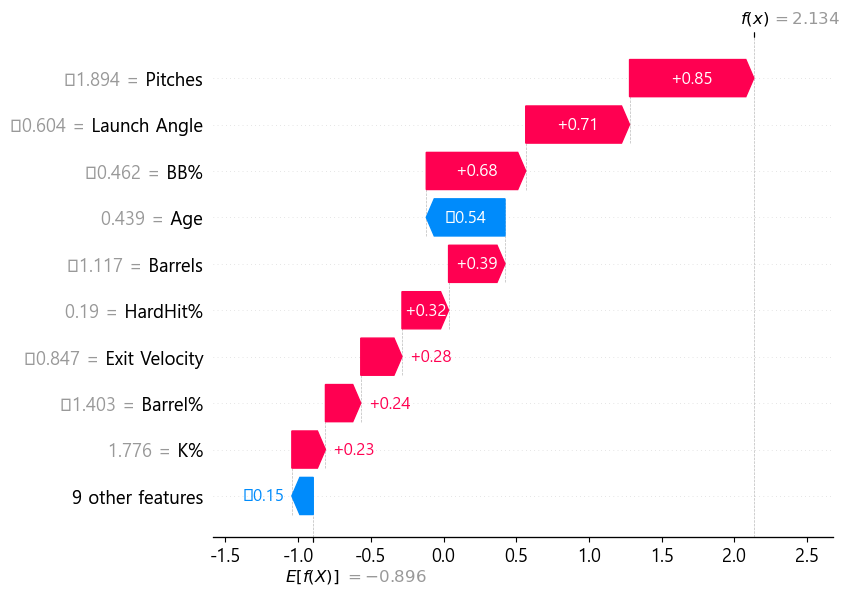

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
#plt.rcParams['axes.unicode_minus'] = False
#matplotlib.rc('axes', unicode_minus = False)
shap.plots.waterfall(shap_values[0])

In [24]:
cat.fit(X,y)

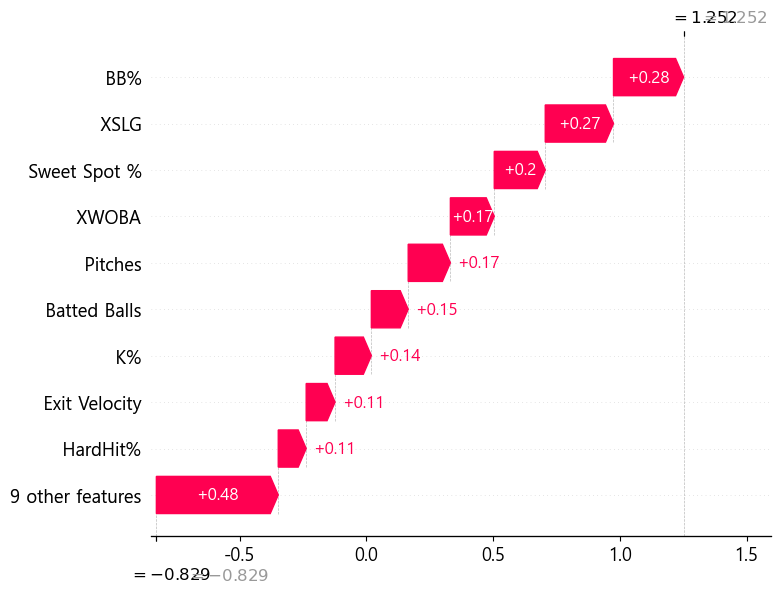

In [25]:
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X)
#shap.plots.waterfall(shap_values[0])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0],\
                                      features = X.iloc[0,:],)

In [25]:
korea_major2 = pd.read_csv("./외국인타자MLB배럴성적2.csv")
korea_major2 = korea_major2.iloc[:-5].reset_index(drop = True)
korea_major2.head()

,영문이름,이름,구단,재계약,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,...,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
0,Daniel Casey Dorn,대니 돈,키움,1.0,2015,30,125,20,0,0.0,...,8.6,25.0,0.184,0.234,0.192,0.215,0.279,35.0,31.3,6.3
1,Hector Alexis Gomez,헥터 고메즈,SSG,0.0,2015,27,488,89,3,3.4,...,14.2,36.0,0.222,0.311,0.231,0.250,0.342,29.2,29.9,2.2
2,Wilin Arismendy Rosario,윌린 로사리오,한화,1.0,2015,26,859,177,8,4.5,...,5.8,26.0,0.231,0.354,0.303,0.269,0.340,33.9,23.1,3.3
3,Justin Adam Maxwell,저스틴 맥스웰,롯데,0.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3
4,Xavier Ladel Scruggs,재비어 스크럭스,NC,1.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3


In [26]:
X2 = korea_major2.drop(columns = ["영문이름", "이름", "구단","재계약","Season"])
X2 = X2.astype(float)
y2 = korea_major2["재계약"]

In [27]:
X = X2.copy()
y = y2.copy()

In [29]:
three_evaluation()

----- accuracy -----
lr : [0.66666667 0.44444444 0.55555556 0.44444444 0.66666667], mean : 0.5555555555555556
rf : [0.55555556 0.33333333 0.55555556 0.55555556 0.66666667], mean : 0.5333333333333333
xgb : [0.44444444 0.33333333 0.66666667 0.66666667 0.44444444], mean : 0.5111111111111111
lgbm : [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667], mean : 0.6666666666666666
cat : [0.55555556 0.44444444 0.55555556 0.55555556 0.66666667], mean : 0.5555555555555556
None
----- roc_auc -----
lr : [0.25       0.55555556 0.72222222 0.27777778 0.61111111], mean : 0.4833333333333334
rf : [0.13888889 0.25       0.55555556 0.33333333 0.61111111], mean : 0.37777777777777777
xgb : [0.25       0.33333333 0.5        0.44444444 0.55555556], mean : 0.41666666666666663
lgbm : [0.5 0.5 0.5 0.5 0.5], mean : 0.5
cat : [0.25       0.16666667 0.5        0.44444444 0.5       ], mean : 0.37222222222222223
None
----- precision -----
lr : [0.         0.25       0.33333333 0.         0.5       ], mean : 0.2166

In [53]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X2,y2, cv=cv).mean()}')
print(f'svc : {cross_val_score(svc, X2,y2, cv=cv).mean()}')
print(f'rf : {cross_val_score(rf, X2,y2, cv=cv).mean()}')
print(f'cat : {cross_val_score(cat, X2,y2, cv=cv).mean()}')
print(f'xgb : {cross_val_score(xgb, X2,y2, cv=cv).mean()}')
print(f'lgbm: {cross_val_score(lgbm, X2,y2, cv=cv).mean()}')

lr : 0.5644444444444444
svc : 0.6533333333333332
rf : 0.671111111111111
cat : 0.6288888888888888
xgb : 0.5666666666666667
lgbm: 0.6533333333333332


In [54]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'lr : {cross_val_score(lr, X2,y2, cv=cv,scoring="roc_auc").mean()}')
print(f'svc : {cross_val_score(svc, X2,y2, cv=cv,scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf, X2,y2, cv=cv,scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat, X2,y2, cv=cv,scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb, X2,y2, cv=cv,scoring="roc_auc").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X2,y2, cv=cv,scoring="roc_auc").mean()}')

lr : 0.5263888888888888
svc : 0.5180555555555555
rf : 0.5708333333333333
cat : 0.523611111111111
xgb : 0.5597222222222221
lgbm: 0.5


In [202]:
print(f'lr : {cross_val_score(lr, X2,y2, cv=5,scoring="precision").mean()}')
print(f'svc : {cross_val_score(svc, X2,y2, cv=5,scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf, X2,y2, cv=5,scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat, X2,y2, cv=5,scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb, X2,y2, cv=5,scoring="precision").mean()}')
print(f'lgbm: {cross_val_score(lgbm, X2,y2, cv=5,scoring="precision").mean()}')

lr : 0.3333333333333333
svc : 0.0
rf : 0.5
cat : 0.6
xgb : 0.54
lgbm: 0.0


# 메이저리그 + face

In [42]:
import os

path = r"C:\P_data\외국인타자\타자얼굴사진\0"

file_names = os.listdir(path)
file_names_without_extension1 = [os.path.splitext(file_name)[0] for file_name in file_names]
#print(file_names_without_extension1)

path = r"C:\P_data\외국인타자\타자얼굴사진\1"

file_names = os.listdir(path)
file_names_without_extension2 = [os.path.splitext(file_name)[0] for file_name in file_names]
#print(file_names_without_extension2)

file_names_without_extension = file_names_without_extension1 + file_names_without_extension2


In [43]:
vggface_df = pd.read_csv("C:/P_data/facenet/VGGFace_df_batter.csv")
vggface_df["이름"] = file_names_without_extension

vggface_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label,이름
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.303472,0.0,0.0,0.0,0.0,0.0,0.0,DJ 피터스
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.298074,0.0,0.0,0.0,0.0,0.0,0.0,나이저 모건
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.327351,0.0,0.0,0.0,0.0,0.0,0.0,닉 마티니
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.313127,0.0,0.0,0.0,0.0,0.0,0.0,다니엘 팔카
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.310674,0.0,0.0,0.0,0.0,0.0,0.0,대니 워스


In [44]:
# 얼굴만

face_df = vggface_df.copy()
X = face_df.drop(columns = ["label","이름"])
y = face_df["label"]

# 얼굴만
three_evaluation()



----- accuracy -----
lr : [0.625      0.625      0.66666667 0.66666667 0.66666667], mean : 0.6499999999999999
rf : [0.625      0.5625     0.46666667 0.53333333 0.66666667], mean : 0.5708333333333333
xgb : [0.6875     0.6875     0.46666667 0.4        0.73333333], mean : 0.595
lgbm : [0.5        0.625      0.6        0.53333333 0.73333333], mean : 0.5983333333333334
cat : [0.625      0.5625     0.46666667 0.4        0.66666667], mean : 0.5441666666666667
None
----- roc_auc -----
lr : [0.7        0.46666667 0.5        0.64       0.54      ], mean : 0.5693333333333334
rf : [0.54166667 0.55       0.27       0.45       0.54      ], mean : 0.4703333333333333
xgb : [0.55       0.58333333 0.44       0.42       0.72      ], mean : 0.5426666666666666
lgbm : [0.6  0.55 0.48 0.4  0.74], mean : 0.5539999999999999
cat : [0.5        0.58333333 0.36       0.5        0.7       ], mean : 0.5286666666666667
None
----- precision -----
lr : [0.  0.  0.5 0.  0. ], mean : 0.1
rf : [0.5 0.  0.  0.5 0.5], mean 

In [67]:
temp = pd.read_csv("./메이저기록타자표준화.csv")
temp["이름"] = korea_major["이름"]


In [68]:
major_face_df = pd.merge(temp, vggface_df, on = ["이름"])

In [69]:
X = major_face_df.drop(columns = ["label","이름","재계약"])
y = major_face_df["label"]

In [70]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.6583333333333333
lr : 0.6333333333333333
rf : 0.6333333333333333
cat : 0.6777777777777778
lgbm : 0.6583333333333333
xgb : 0.7222222222222222


In [71]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.5111111111111112
lr : 0.5533333333333333
rf : 0.5588888888888889
cat : 0.6244444444444445
lgbm : 0.5
xgb : 0.7422222222222223


In [72]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.0
lr : 0.4666666666666667
rf : 0.26666666666666666
cat : 0.5
lgbm : 0.0
xgb : 0.5333333333333333


## 얼굴에서 차원축소 - pca

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca_df = pca.fit_transform(vggface_df.drop(columns = ["label","이름"]))
print(f"누적기여율 : ", pca.explained_variance_ratio_)

누적기여율 :  [0.58185935 0.14375191 0.07796171 0.06148069 0.03573588 0.02424676
 0.02023561 0.009756   0.00679128 0.00570693]


In [86]:
temp = pd.read_csv("./메이저기록타자표준화.csv")
temp["이름"] = korea_major["이름"]

In [88]:
temp_pca = pd.DataFrame(pca_df[:,:2], columns=["PCA_1","PCA_2"])
temp_pca["이름"] = vggface_df["이름"]
major_facepca_df = pd.merge(temp, temp_pca, on = ["이름"])

In [89]:
# temp_pca = pd.DataFrame(pca_df[:,:3], columns=["PCA_1","PCA_2","PCA_3"])
# temp_pca["이름"] = vggface_df["이름"]
# major_facepca_df = pd.merge(temp, temp_pca, on = ["이름"])

In [90]:
X = major_facepca_df.drop(columns = ["이름","재계약"])
y = major_facepca_df["재계약"]

In [80]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.6583333333333333
lr : 0.6333333333333333
rf : 0.7027777777777777
cat : 0.6583333333333333
lgbm : 0.6583333333333333
xgb : 0.5444444444444445


In [91]:
# cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

# print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
# print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
# print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
# print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
# print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
# print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.6583333333333333
lr : 0.6333333333333333
rf : 0.7027777777777777
cat : 0.6805555555555556
lgbm : 0.6583333333333333
xgb : 0.5666666666666667


In [81]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.4533333333333333
lr : 0.58
rf : 0.5677777777777777
cat : 0.5000000000000001
lgbm : 0.5
xgb : 0.5377777777777778


In [92]:
# cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

# print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
# print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
# print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
# print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
# print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
# print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.4533333333333333
lr : 0.58
rf : 0.5022222222222222
cat : 0.5244444444444445
lgbm : 0.5
xgb : 0.5377777777777778


In [82]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.0
lr : 0.4666666666666667
rf : 0.52
cat : 0.3
lgbm : 0.0
xgb : 0.36666666666666664


In [93]:
# cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

# print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
# print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
# print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
# print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
# print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
# print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.0
lr : 0.4666666666666667
rf : 0.21333333333333332
cat : 0.3333333333333333
lgbm : 0.0
xgb : 0.38666666666666666


## 얼굴에서 차원축소 - 커털pca

In [94]:
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import PCA

kpca = KernelPCA(n_components=2)
kpca_df = kpca.fit_transform(vggface_df.drop(columns = ["label","이름"]))
kpca_df = pd.DataFrame(kpca_df, columns = ["kPCA_1","kPCA_2"])
kpca_df
#print(f"누적기여율 : ", kpca.explained_variance_ratio_)

,kPCA_1,kPCA_2
0,-0.182295,0.026984
1,0.099419,0.104772
2,-0.190905,-0.163277
3,-0.229527,-0.085268
4,-0.298738,0.175059
...,...,...
72,-0.432361,-0.064826
73,-1.180192,-0.301514
74,0.185475,-0.039607
75,0.226531,-0.100632


In [95]:
temp = pd.read_csv("./메이저기록타자표준화.csv")
temp["이름"] = korea_major["이름"]
temp_kpca = pd.DataFrame(pca_df[:,:2], columns=["kPCA_1","kPCA_2"])
temp_kpca["이름"] = vggface_df["이름"]
major_face_kpca_df = pd.merge(temp, temp_kpca, on = ["이름"])

In [96]:
X = major_face_kpca_df.drop(columns = ["이름","재계약"])
y = major_face_kpca_df["재계약"]

In [97]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.6583333333333333
lr : 0.6333333333333333
rf : 0.6583333333333333
cat : 0.6583333333333333
lgbm : 0.6583333333333333
xgb : 0.5444444444444445


In [98]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.4533333333333333
lr : 0.58
rf : 0.5477777777777778
cat : 0.5000000000000001
lgbm : 0.5
xgb : 0.5377777777777778


In [99]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.0
lr : 0.4666666666666667
rf : 0.5
cat : 0.3
lgbm : 0.0
xgb : 0.36666666666666664


# KBO 성적

In [18]:
kbo = pd.read_csv("./외국인타자_국내성적.csv")

X = kbo.drop(columns = ["연도", "구단", "이름","수비율","연봉","재계약","P","KBO_팀순위"])
y = kbo["재계약"]


In [19]:
X

,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,27,125,602,500,118,154,27,1,31,276,...,7,0,5,0.308,0.417,0.552,0.969,0.424,139.2,6.23
1,32,111,419,376,56,116,25,1,18,197,...,11,0,2,0.309,0.375,0.524,0.899,0.395,134.8,3.10
2,28,63,275,240,33,64,8,1,10,104,...,10,0,4,0.267,0.346,0.433,0.779,0.347,101.6,1.47
3,32,37,113,100,17,21,7,0,4,40,...,0,0,1,0.210,0.292,0.400,0.692,0.308,76.2,0.14
4,34,79,247,216,30,66,18,0,2,90,...,7,0,1,0.306,0.389,0.417,0.805,0.368,104.1,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,32,139,576,510,67,153,34,1,16,237,...,8,0,7,0.300,0.368,0.465,0.833,0.376,134.9,3.96
73,26,85,354,316,32,72,16,0,13,127,...,5,0,4,0.228,0.299,0.402,0.701,0.319,93.7,1.18
74,29,56,251,218,32,72,10,1,8,108,...,4,0,2,0.330,0.410,0.495,0.906,0.411,156.3,2.30
75,30,127,554,514,83,160,29,7,17,254,...,11,0,4,0.311,0.354,0.494,0.848,0.380,137.0,4.97


In [20]:
X.columns

Index(['나이', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루',
       '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루', '장타', 'OPS',
       'wOBA', 'wRC+', 'WAR'],
      dtype='object')

In [192]:
y.value_counts()

0    50
1    27
Name: 재계약, dtype: int64

In [194]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8308333333333333
lr : 0.8308333333333333
rf : 0.8066666666666666
cat : 0.78
lgbm : 0.8066666666666666
xgb : 0.8458333333333334


In [195]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.8946666666666667
lr : 0.9280000000000002
rf : 0.9213333333333333
cat : 0.9059999999999999
lgbm : 0.8899999999999999
xgb : 0.9086666666666666


In [196]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.7461904761904762
lr : 0.7761904761904761
rf : 0.6983333333333335
cat : 0.6883333333333332
lgbm : 0.7561904761904762
xgb : 0.8261904761904763


## MLB기록 갖고 있는 45명의 KBO기록

In [198]:
korea_major = pd.read_csv("./외국인타자MLB배럴성적2.csv")
korea_major = korea_major.iloc[:-5]

In [199]:
kbo.head()

,연도,구단,KBO_팀순위,이름,수비율,연봉,재계약,나이,P,G,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,2014,삼성,1,야마이코 나바로,0.987,25000.0,1,27,2B,125,...,7,0,5,0.308,0.417,0.552,0.969,0.424,139.2,6.23
1,2014,두산,6,호르헤 칸투,0.994,30000.0,0,32,1B,111,...,11,0,2,0.309,0.375,0.524,0.899,0.395,134.8,3.10
2,2014,LG,4,조쉬 벨,0.981,25000.0,0,28,3B,63,...,10,0,4,0.267,0.346,0.433,0.779,0.347,101.6,1.47
3,2014,LG,4,브래드 스나이더,1.000,15000.0,0,32,CF,37,...,0,0,1,0.210,0.292,0.400,0.692,0.308,76.2,0.14
4,2014,넥센,2,비니 로티노,0.987,27000.0,0,34,LF,79,...,7,0,1,0.306,0.389,0.417,0.805,0.368,104.1,1.11


In [200]:
kbo_df = pd.merge(kbo, korea_major["이름"], on = "이름")

In [203]:
X = kbo_df.drop(columns = ["연도", "구단", "이름","수비율","연봉","재계약","P","KBO_팀순위"])
y = kbo_df["재계약"]

In [205]:
y.value_counts()

0    30
1    15
Name: 재계약, dtype: int64

In [206]:
30/45

0.6666666666666666

In [208]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8444444444444444
lr : 0.9111111111111111
rf : 0.8444444444444444
cat : 0.7999999999999999
lgbm : 0.6666666666666666
xgb : 0.7999999999999999


In [209]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9
lr : 0.9333333333333333
rf : 0.9333333333333333
cat : 0.9222222222222222
lgbm : 0.5
xgb : 0.8944444444444445


In [210]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.7866666666666667
lr : 0.9333333333333332
rf : 0.77
cat : 0.75
lgbm : 0.0
xgb : 0.7833333333333333


In [211]:
# 27 + 팀순위

X = kbo_df.drop(columns = ["연도", "구단", "이름","수비율","연봉","재계약","P"])
y = kbo_df["재계약"]

In [212]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8444444444444444
lr : 0.9111111111111111
rf : 0.8222222222222222
cat : 0.7999999999999999
lgbm : 0.6666666666666666
xgb : 0.8222222222222222


In [213]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9
lr : 0.9333333333333333
rf : 0.9222222222222223
cat : 0.9222222222222222
lgbm : 0.5
xgb : 0.9055555555555556


In [214]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.7866666666666667
lr : 0.9333333333333332
rf : 0.77
cat : 0.75
lgbm : 0.0
xgb : 0.8333333333333334


## 얼굴 + kbo 성적 45명

In [215]:
import os

path = r"C:\P_data\외국인타자\타자얼굴사진\0"

file_names = os.listdir(path)
file_names_without_extension1 = [os.path.splitext(file_name)[0] for file_name in file_names]
#print(file_names_without_extension1)

path = r"C:\P_data\외국인타자\타자얼굴사진\1"

file_names = os.listdir(path)
file_names_without_extension2 = [os.path.splitext(file_name)[0] for file_name in file_names]
#print(file_names_without_extension2)

file_names_without_extension = file_names_without_extension1 + file_names_without_extension2


In [216]:
vggface_df = pd.read_csv("C:/P_data/facenet/VGGFace_df_batter.csv")
vggface_df["이름"] = file_names_without_extension

vggface_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label,이름
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.303472,0.0,0.0,0.0,0.0,0.0,0.0,DJ 피터스
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.298074,0.0,0.0,0.0,0.0,0.0,0.0,나이저 모건
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.327351,0.0,0.0,0.0,0.0,0.0,0.0,닉 마티니
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.313127,0.0,0.0,0.0,0.0,0.0,0.0,다니엘 팔카
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.310674,0.0,0.0,0.0,0.0,0.0,0.0,대니 워스


In [217]:
vggface_df.shape

(77, 2050)

In [218]:
korea_major = pd.read_csv("./외국인타자MLB배럴성적2.csv")
korea_major = korea_major.iloc[:-5]

In [219]:
korea_major.head()

,영문이름,이름,구단,재계약,Season,Age,Pitches,Batted Balls,Barrels,Barrel%,...,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%
0,Daniel Casey Dorn,대니 돈,키움,1.0,2015,30,125,20,0,0.0,...,8.6,25.0,0.184,0.234,0.192,0.215,0.279,35.0,31.3,6.3
1,Hector Alexis Gomez,헥터 고메즈,SSG,0.0,2015,27,488,89,3,3.4,...,14.2,36.0,0.222,0.311,0.231,0.250,0.342,29.2,29.9,2.2
2,Wilin Arismendy Rosario,윌린 로사리오,한화,1.0,2015,26,859,177,8,4.5,...,5.8,26.0,0.231,0.354,0.303,0.269,0.340,33.9,23.1,3.3
3,Justin Adam Maxwell,저스틴 맥스웰,롯데,0.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3
4,Xavier Ladel Scruggs,재비어 스크럭스,NC,1.0,2015,31,1030,175,9,5.1,...,10.3,30.9,0.213,0.358,0.271,0.283,0.359,32.0,27.7,7.3


In [225]:
kbo_df = kbo.drop(columns = ["연도", "구단", "수비율","연봉","재계약","P"])

kbo_df = kbo_df[kbo_df["이름"].isin(korea_major["이름"])].reset_index(drop = True)

kbo_face = pd.merge(vggface_df, kbo_df, on = "이름")

In [226]:
# 얼굴 + 27 + 팀순위

X = kbo_face.drop(columns = ["이름","label"])
y = kbo_face["label"]

In [227]:
y.value_counts()

0.0    30
1.0    15
Name: label, dtype: int64

In [230]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8
lr : 0.8666666666666666
rf : 0.7777777777777778
cat : 0.8444444444444444
lgbm : 0.6666666666666666
xgb : 0.8222222222222222


In [231]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9333333333333333
lr : 0.9777777777777779
rf : 0.9
cat : 0.9333333333333332
lgbm : 0.5
xgb : 0.9444444444444444


In [232]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.8
lr : 0.72
rf : 0.6666666666666666
cat : 0.7833333333333333
lgbm : 0.0
xgb : 0.75


In [233]:
# 얼굴 + 27

X = kbo_face.drop(columns = ["이름","label","KBO_팀순위"])
y = kbo_face["label"]

In [234]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8
lr : 0.888888888888889
rf : 0.8222222222222222
cat : 0.8444444444444444
lgbm : 0.6666666666666666
xgb : 0.8222222222222222


In [235]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9222222222222222
lr : 0.9777777777777779
rf : 0.9277777777777778
cat : 0.9333333333333332
lgbm : 0.5
xgb : 0.9444444444444444


In [236]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.8
lr : 0.72
rf : 0.6833333333333333
cat : 0.7833333333333333
lgbm : 0.0
xgb : 0.75


## 얼굴 차원축소 + KBO 성적 45명

In [237]:
vggface_df.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label,이름
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.303472,0.0,0.0,0.0,0.0,0.0,0.0,DJ 피터스


In [238]:
# 차원축소

pca = PCA(n_components=2)
pca_temp_vgg = vggface_df.drop(columns = ["label","이름"])
pca_temp_vgg = pca.fit_transform(pca_temp_vgg)
pca_temp_vgg = pd.DataFrame(pca_temp_vgg, columns=["PCA_1","PCA_2"])
pca_temp_vgg["label"] = vggface_df["label"]
pca_temp_vgg["Name"] = vggface_df["이름"]

In [239]:
pca_temp_vgg

,PCA_1,PCA_2,label,Name
0,-0.182295,0.026984,0.0,DJ 피터스
1,0.099419,0.104772,0.0,나이저 모건
2,-0.190905,-0.163277,0.0,닉 마티니
3,-0.229527,-0.085268,0.0,다니엘 팔카
4,-0.298738,0.175059,0.0,대니 워스
...,...,...,...,...
72,-0.432361,-0.064826,1.0,제이미 로맥
73,-1.180192,-0.301514,1.0,짐 아두치
74,0.185475,-0.039607,1.0,프레스톤 터커
75,0.226531,-0.100632,1.0,호세 미겔 페르난데스


In [252]:
kbo_df

,KBO_팀순위,이름,나이,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,3,대니 돈,32,129,497,417,65,123,33,1,...,8,1,4,0.295,0.399,0.494,0.893,0.398,123.4,3.03
1,6,헥터 고메즈,28,117,492,456,74,129,31,0,...,11,2,4,0.283,0.325,0.489,0.814,0.353,95.5,2.19
2,7,윌린 로사리오,28,119,510,445,100,151,30,1,...,12,0,5,0.339,0.414,0.661,1.074,0.450,165.3,5.20
3,8,저스틴 맥스웰,33,23,99,80,14,23,3,1,...,0,0,1,0.288,0.414,0.500,0.914,0.411,134.0,0.75
4,4,재비어 스크럭스,30,115,518,437,91,131,24,0,...,9,0,4,0.300,0.402,0.595,0.997,0.423,150.2,4.26
5,6,제임스 로니,33,23,93,79,7,22,5,0,...,1,0,2,0.278,0.366,0.456,0.821,0.359,112.9,0.34
6,5,대니 워스,32,3,11,9,0,1,0,0,...,1,0,0,0.111,0.273,0.111,0.384,0.217,12.4,-0.11
7,5,제이미 로맥,32,102,416,359,58,87,19,0,...,6,0,1,0.242,0.344,0.554,0.898,0.378,117.3,2.03
8,9,다린 러프,31,134,591,515,90,162,38,0,...,14,0,4,0.315,0.396,0.569,0.965,0.414,142.6,3.92
9,2,지미 파레디스,30,21,71,65,7,9,2,1,...,0,0,1,0.138,0.197,0.246,0.443,0.191,-2.4,-0.73


In [253]:
df = kbo_df.copy()
df = df.rename(columns = {"이름" : "Name"})

pca_kbo_face = pd.merge(pca_temp_vgg, df, on = "Name")
pca_kbo_face

,PCA_1,PCA_2,label,Name,KBO_팀순위,나이,G,타석,타수,득점,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,-0.182295,0.026984,0.0,DJ 피터스,8,26,85,354,316,32,...,5,0,4,0.228,0.299,0.402,0.701,0.319,93.7,1.18
1,-0.190905,-0.163277,0.0,닉 마티니,6,32,139,576,510,67,...,8,0,7,0.300,0.368,0.465,0.833,0.376,134.9,3.96
2,-0.229527,-0.085268,0.0,다니엘 팔카,8,29,51,217,196,17,...,5,0,3,0.209,0.272,0.367,0.639,0.288,60.3,-0.66
3,-0.298738,0.175059,0.0,대니 워스,5,32,3,11,9,0,...,1,0,0,0.111,0.273,0.111,0.384,0.217,12.4,-0.11
4,-0.536945,0.005839,0.0,데이비드 프레이타스,5,32,43,148,139,13,...,7,0,1,0.259,0.297,0.374,0.671,0.313,81.8,-0.04
5,-0.780143,-0.058218,0.0,라이온 힐리,10,29,67,268,249,27,...,6,0,1,0.257,0.306,0.394,0.700,0.325,91.0,0.35
6,0.425555,-0.147225,0.0,로벨 가르시아,2,29,38,152,132,20,...,4,0,0,0.206,0.308,0.353,0.661,0.310,93.1,0.57
7,0.799255,-0.140840,0.0,마이크 터크먼,10,32,144,648,575,88,...,12,0,2,0.289,0.366,0.430,0.795,0.365,126.8,4.98
8,-0.480402,0.199661,0.0,맥 윌리엄슨,8,29,40,168,154,19,...,2,0,1,0.273,0.327,0.409,0.737,0.339,101.9,0.46
9,-0.102249,0.283600,0.0,브랜든 반즈,10,34,74,319,283,38,...,4,0,2,0.265,0.342,0.428,0.769,0.349,104.5,1.23


In [254]:
# 얼굴2 + 27개 + 팀순위

X = pca_kbo_face.drop(columns = ["label","Name"])
y = pca_kbo_face["label"]

In [255]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8
lr : 0.8666666666666666
rf : 0.8444444444444444
cat : 0.8444444444444444
lgbm : 0.6666666666666666
xgb : 0.8222222222222222


In [256]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9222222222222223
lr : 0.9666666666666666
rf : 0.9444444444444443
cat : 0.9555555555555555
lgbm : 0.5
xgb : 0.9388888888888889


In [257]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.8
lr : 0.72
rf : 0.85
cat : 0.7833333333333333
lgbm : 0.0
xgb : 0.75


In [259]:
X.head()

,PCA_1,PCA_2,KBO_팀순위,나이,G,타석,타수,득점,안타,2타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,-0.182295,0.026984,8,26,85,354,316,32,72,16,...,5,0,4,0.228,0.299,0.402,0.701,0.319,93.7,1.18
1,-0.190905,-0.163277,6,32,139,576,510,67,153,34,...,8,0,7,0.300,0.368,0.465,0.833,0.376,134.9,3.96
2,-0.229527,-0.085268,8,29,51,217,196,17,41,7,...,5,0,3,0.209,0.272,0.367,0.639,0.288,60.3,-0.66
3,-0.298738,0.175059,5,32,3,11,9,0,1,0,...,1,0,0,0.111,0.273,0.111,0.384,0.217,12.4,-0.11
4,-0.536945,0.005839,5,32,43,148,139,13,36,10,...,7,0,1,0.259,0.297,0.374,0.671,0.313,81.8,-0.04


In [261]:
# 얼굴2 + 27
X = pca_kbo_face.drop(columns = ["label","Name","KBO_팀순위"])
y = pca_kbo_face["label"]

In [262]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="accuracy").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="accuracy").mean()}')

svc : 0.8
lr : 0.888888888888889
rf : 0.8666666666666666
cat : 0.8444444444444444
lgbm : 0.6666666666666666
xgb : 0.8222222222222222


In [263]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="roc_auc").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="roc_auc").mean()}')

svc : 0.9222222222222223
lr : 0.9666666666666666
rf : 0.9555555555555555
cat : 0.9555555555555555
lgbm : 0.5
xgb : 0.9388888888888889


In [264]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 77)

print(f'svc : {cross_val_score(svc,X,y, cv = cv, scoring="precision").mean()}')
print(f'lr : {cross_val_score(lr,X,y, cv = cv, scoring="precision").mean()}')
print(f'rf : {cross_val_score(rf,X,y, cv = cv, scoring="precision").mean()}')
print(f'cat : {cross_val_score(cat,X,y, cv = cv, scoring="precision").mean()}')
print(f'lgbm : {cross_val_score(lgbm,X,y, cv = cv, scoring="precision").mean()}')
print(f'xgb : {cross_val_score(xgb,X,y, cv = cv, scoring="precision").mean()}')

svc : 0.8
lr : 0.72
rf : 0.7333333333333333
cat : 0.7833333333333333
lgbm : 0.0
xgb : 0.75


In [265]:
X.head()

,PCA_1,PCA_2,나이,G,타석,타수,득점,안타,2타,3타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,-0.182295,0.026984,26,85,354,316,32,72,16,0,...,5,0,4,0.228,0.299,0.402,0.701,0.319,93.7,1.18
1,-0.190905,-0.163277,32,139,576,510,67,153,34,1,...,8,0,7,0.300,0.368,0.465,0.833,0.376,134.9,3.96
2,-0.229527,-0.085268,29,51,217,196,17,41,7,0,...,5,0,3,0.209,0.272,0.367,0.639,0.288,60.3,-0.66
3,-0.298738,0.175059,32,3,11,9,0,1,0,0,...,1,0,0,0.111,0.273,0.111,0.384,0.217,12.4,-0.11
4,-0.536945,0.005839,32,43,148,139,13,36,10,0,...,7,0,1,0.259,0.297,0.374,0.671,0.313,81.8,-0.04
